# Problem klasyfikacji binarnej na przykładzie danych strumieniowych

In [24]:
# Read Text Files with Pandas using read_csv()

# importing pandas
%pip install pandas
import pandas as pd

# read text file into pandas DataFrame
df = pd.read_csv("streaming_NLP_Bag_Of_Words.txt", sep="delimiter",  header=None)

# display DataFrame
print(df)

Note: you may need to restart the kernel to use updated packages.
                         0
0       Love is beautiful.
1      Love is expensive 💔
2         how cold love is
3         Love is fake atp
4    You know what love is
..                     ...
133      Love is weird.🍃💫🌥
134         Love is stupid
135         Love is weird.
136    Good love is my jam
137    love is so pogchamp

[138 rows x 1 columns]


/tmp/ipykernel_2773/3166073622.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("streaming_NLP_Bag_Of_Words.txt", sep="delimiter",  header=None)


In [25]:
for a in df:
    tweet_info_ls = df[0].values.tolist()
tweet_info_ls

['Love is beautiful.',
 'Love is expensive 💔',
 'how cold love is',
 'Love is fake atp',
 'You know what love is',
 'Love is dead✌🏼',
 'Love is not possession.',
 'love is a losing game',
 'Love is love ❤️',
 'Love is so scary.',
 'Love is trust',
 'Love is sweet sha',
 'Love is endurance',
 'i mean, in us',
 'Your love is suicidal',
 'Love is like Heaven',
 'Love is Never enough',
 'Love is forgiving',
 'Love is just a word',
 'Love is a dangerous game',
 'oh daft love is out',
 'Church love is up.',
 'Love is trust',
 'Love is a fucking lie.',
 'YOUR LOVE IS PERFECTION',
 'His love is without end',
 'Our love is God',
 'Love is a drug 💊',
 'Love is scary y’all',
 'Love is Gangsta',
 'love is random',
 "Love is hard. I'm sad. 😔",
 'Your love is toxic',
 'Love is… Love is pain.',
 'Love is my master',
 'Love is Love Beloved',
 'Keep records of good',
 'love is out to kill me.',
 'Our love is god!',
 'Love is blind',
 'Love is trust',
 'Love is gangster yeah',
 'Love is not for the weak

## 1. Obróbka danych

### 1.1. Usuwanie emotikon

In [26]:
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

new_lst = []
for i in tweet_info_ls:
    i=remove_emoji(i)
    new_lst.append(i)

tweets_df = pd.DataFrame(new_lst)
tweets_df

,0
0,Love is beautiful.
1,Love is expensive
2,how cold love is
3,Love is fake atp
4,You know what love is
...,...
133,Love is weird.
134,Love is stupid
135,Love is weird.
136,Good love is my jam


### 1.2. Usuwanie linków oraz ujednolicenie pisowni

In [27]:
pattern=r'(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))';
test=[]
for a in new_lst:
    a = re.sub(pattern,"", a)
    a=a.lower()
    test.append(a)

tweeties_df = pd.DataFrame(test)
tweeties_df

,0
0,love is beautiful.
1,love is expensive
2,how cold love is
3,love is fake atp
4,you know what love is
...,...
133,love is weird.
134,love is stupid
135,love is weird.
136,good love is my jam


### 1.3. Rozwinięcie skrótów

In [28]:
%pip install contractions
import contractions
expanded=[]
for word in test:
    #expanding contractions
    expanded.append(contractions.fix(word))

expanded_text = ' '.join(expanded)
expanded_df = pd.DataFrame(expanded)

Note: you may need to restart the kernel to use updated packages.


### 1.4. Usuwanie znaków specjalnych

In [29]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","$","\n", "—", "..."]
for char in spec_chars:
    expanded_df[0] = expanded_df[0].str.replace(char, ' ', regex=False)

expanded_df

,0
0,love is beautiful
1,love is expensive
2,how cold love is
3,love is fake atp
4,you know what love is
...,...
133,love is weird
134,love is stupid
135,love is weird
136,good love is my jam


### 1.5. Usuwanie pojedynczych znaków, znaków interpunkcyjnych, liczb, złożeń słowno-liczbowych

In [30]:
sentences_list=[]

for a in tweeties_df:
    sentences_list = expanded_df[0].values.tolist()

numbers = r'[0-9]'
sentences_without_numbers=[]
for a in sentences_list:
    a = re.sub(numbers,"", a)
    sentences_without_numbers.append(a)

%pip install nltk
import pickle as pk
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def remove_single_char_func(text, threshold=1):
    '''
    Removes single characters from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes words whose length falls below the threshold (by default = 1)
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with removed words whose length was below the threshold (by default = 1)
    ''' 
    threshold = threshold
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if len(word) > threshold])
    return text

no_sing_char_list=[]
for sentence in sentences_without_numbers:
    sentence = remove_single_char_func(sentence, threshold=1)
    no_sing_char_list.append(sentence)

no_sing_char_list

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['love is beautiful',
 'love is expensive',
 'how cold love is',
 'love is fake atp',
 'you know what love is',
 'love is dead',
 'love is not possession',
 'love is losing game',
 'love is love',
 'love is so scary',
 'love is trust',
 'love is sweet sha',
 'love is endurance',
 'mean in us',
 'your love is suicidal',
 'love is like heaven',
 'love is never enough',
 'love is forgiving',
 'love is just word',
 'love is dangerous game',
 'oh daft love is out',
 'church love is up',
 'love is trust',
 'love is fucking lie',
 'your love is perfection',
 'his love is without end',
 'our love is god',
 'love is drug',
 'love is scary you all',
 'love is gangsta',
 'love is random',
 'love is hard am sad',
 'your love is toxic',
 'love is… love is pain',
 'love is my master',
 'love is love beloved',
 'keep records of good',
 'love is out to kill me',
 'our love is god',
 'love is blind',
 'love is trust',
 'love is gangster yeah',
 'love is not for the weak',
 'love is timeless',
 'agreed 

### 1.6. Zamiana wielokrotnej spacji na pojedynczą spację

In [31]:
single_char=[]
for a in no_sing_char_list:
    a = re.sub(r'\s+', ' ', a, flags=re.I)
    a = re.sub('…',' ', a, flags=re.I)
    a = re.sub('\.+',' ', a, flags=re.I)
    single_char.append(a)

print(single_char)


['love is beautiful', 'love is expensive', 'how cold love is', 'love is fake atp', 'you know what love is', 'love is dead', 'love is not possession', 'love is losing game', 'love is love', 'love is so scary', 'love is trust', 'love is sweet sha', 'love is endurance', 'mean in us', 'your love is suicidal', 'love is like heaven', 'love is never enough', 'love is forgiving', 'love is just word', 'love is dangerous game', 'oh daft love is out', 'church love is up', 'love is trust', 'love is fucking lie', 'your love is perfection', 'his love is without end', 'our love is god', 'love is drug', 'love is scary you all', 'love is gangsta', 'love is random', 'love is hard am sad', 'your love is toxic', 'love is  love is pain', 'love is my master', 'love is love beloved', 'keep records of good', 'love is out to kill me', 'our love is god', 'love is blind', 'love is trust', 'love is gangster yeah', 'love is not for the weak', 'love is timeless', 'agreed love is weird', 'love is needed to live', 'l

### 1.7. Usuwanie "stop-words"

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
sw_nltk.remove('is')
sw_nltk.append('like')
sw_nltk.append('without')
sw_nltk.append('though')
sw_nltk.append('yeah')
sw_nltk.append('sha')
sw_nltk.append('self')

stop_words_removed=[]

for sentence in single_char:
    words = word_tokenize(sentence)
    new_sentence = ' '.join([word for word in words if word not in sw_nltk])
    stop_words_removed.append(new_sentence)

stop_words_removed

['love is beautiful',
 'love is expensive',
 'cold love is',
 'love is fake atp',
 'know love is',
 'love is dead',
 'love is possession',
 'love is losing game',
 'love is love',
 'love is scary',
 'love is trust',
 'love is sweet',
 'love is endurance',
 'mean us',
 'love is suicidal',
 'love is heaven',
 'love is never enough',
 'love is forgiving',
 'love is word',
 'love is dangerous game',
 'oh daft love is',
 'church love is',
 'love is trust',
 'love is fucking lie',
 'love is perfection',
 'love is end',
 'love is god',
 'love is drug',
 'love is scary',
 'love is gangsta',
 'love is random',
 'love is hard sad',
 'love is toxic',
 'love is love is pain',
 'love is master',
 'love is love beloved',
 'keep records good',
 'love is kill',
 'love is god',
 'love is blind',
 'love is trust',
 'love is gangster',
 'love is weak',
 'love is timeless',
 'agreed love is weird',
 'love is needed live',
 'love is hard',
 'love is shit',
 'love is',
 'love is weird',
 'love is rodeo',
 '

### 1.8. Usuwanie nieanglojęzycznych słów

In [34]:
nltk.download('words')
Eng_words = set(nltk.corpus.words.words())

def Eng_rule(sentence):
    #Eng_list=[]
    token_words=word_tokenize(sentence)
    token_words
    Eng_list=[]
    for word in token_words:
        if word in Eng_words:
            Eng_list.append(word)
        else:
            Eng_list.append("")
    return " ".join(Eng_list)

English_list=[]

for i in stop_words_removed:
    English_sentence=Eng_rule(i)
    English_list.append(English_sentence)
    
English_list

[nltk_data] Downloading package words to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package words is already up-to-date!


['love is beautiful',
 'love is expensive',
 'cold love is',
 'love is fake ',
 'know love is',
 'love is dead',
 'love is possession',
 'love is losing game',
 'love is love',
 'love is scary',
 'love is trust',
 'love is sweet',
 'love is endurance',
 'mean us',
 'love is suicidal',
 'love is heaven',
 'love is never enough',
 'love is forgiving',
 'love is word',
 'love is dangerous game',
 'oh daft love is',
 'church love is',
 'love is trust',
 'love is  lie',
 'love is perfection',
 'love is end',
 'love is god',
 'love is drug',
 'love is scary',
 'love is ',
 'love is random',
 'love is hard sad',
 'love is toxic',
 'love is love is pain',
 'love is master',
 'love is love beloved',
 'keep  good',
 'love is kill',
 'love is god',
 'love is blind',
 'love is trust',
 'love is gangster',
 'love is weak',
 'love is timeless',
 'agreed love is weird',
 'love is  live',
 'love is hard',
 'love is ',
 'love is',
 'love is weird',
 'love is rodeo',
 'love is losing game',
 'love is bl

### 1.9. Stemming i lemmatyzacja

In [35]:
%pip install nltk

from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language='english')

from nltk.tokenize import sent_tokenize, word_tokenize

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(snowball.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

stemmed_list=[]

for i in English_list:
    stem_sentence=stemSentence(i)
    stemmed_list.append(stem_sentence)

stemmed_list

Note: you may need to restart the kernel to use updated packages.


['love is beauti ',
 'love is expens ',
 'cold love is ',
 'love is fake ',
 'know love is ',
 'love is dead ',
 'love is possess ',
 'love is lose game ',
 'love is love ',
 'love is scari ',
 'love is trust ',
 'love is sweet ',
 'love is endur ',
 'mean us ',
 'love is suicid ',
 'love is heaven ',
 'love is never enough ',
 'love is forgiv ',
 'love is word ',
 'love is danger game ',
 'oh daft love is ',
 'church love is ',
 'love is trust ',
 'love is lie ',
 'love is perfect ',
 'love is end ',
 'love is god ',
 'love is drug ',
 'love is scari ',
 'love is ',
 'love is random ',
 'love is hard sad ',
 'love is toxic ',
 'love is love is pain ',
 'love is master ',
 'love is love belov ',
 'keep good ',
 'love is kill ',
 'love is god ',
 'love is blind ',
 'love is trust ',
 'love is gangster ',
 'love is weak ',
 'love is timeless ',
 'agre love is weird ',
 'love is live ',
 'love is hard ',
 'love is ',
 'love is ',
 'love is weird ',
 'love is rodeo ',
 'love is lose game '

In [36]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def Lemmat(sentence):
    token_words=word_tokenize(sentence)
    token_words
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

lemmat_list=[]

for i in English_list:
    lem_sentence=Lemmat(i)
    lemmat_list.append(lem_sentence)

lemmat_list

['love be beautiful ',
 'love be expensive ',
 'cold love be ',
 'love be fake ',
 'know love be ',
 'love be dead ',
 'love be possession ',
 'love be lose game ',
 'love be love ',
 'love be scary ',
 'love be trust ',
 'love be sweet ',
 'love be endurance ',
 'mean us ',
 'love be suicidal ',
 'love be heaven ',
 'love be never enough ',
 'love be forgive ',
 'love be word ',
 'love be dangerous game ',
 'oh daft love be ',
 'church love be ',
 'love be trust ',
 'love be lie ',
 'love be perfection ',
 'love be end ',
 'love be god ',
 'love be drug ',
 'love be scary ',
 'love be ',
 'love be random ',
 'love be hard sad ',
 'love be toxic ',
 'love be love be pain ',
 'love be master ',
 'love be love beloved ',
 'keep good ',
 'love be kill ',
 'love be god ',
 'love be blind ',
 'love be trust ',
 'love be gangster ',
 'love be weak ',
 'love be timeless ',
 'agree love be weird ',
 'love be live ',
 'love be hard ',
 'love be ',
 'love be ',
 'love be weird ',
 'love be rodeo

### 1.10. Usuwanie zduplikowanych słów

In [37]:
#deleting duplicates
unduplicated_list=[]
for s in English_list:
    unduplicated_list.append(' '.join(dict.fromkeys(s.split())))

unduplicated_list

['love is beautiful',
 'love is expensive',
 'cold love is',
 'love is fake',
 'know love is',
 'love is dead',
 'love is possession',
 'love is losing game',
 'love is',
 'love is scary',
 'love is trust',
 'love is sweet',
 'love is endurance',
 'mean us',
 'love is suicidal',
 'love is heaven',
 'love is never enough',
 'love is forgiving',
 'love is word',
 'love is dangerous game',
 'oh daft love is',
 'church love is',
 'love is trust',
 'love is lie',
 'love is perfection',
 'love is end',
 'love is god',
 'love is drug',
 'love is scary',
 'love is',
 'love is random',
 'love is hard sad',
 'love is toxic',
 'love is pain',
 'love is master',
 'love is beloved',
 'keep good',
 'love is kill',
 'love is god',
 'love is blind',
 'love is trust',
 'love is gangster',
 'love is weak',
 'love is timeless',
 'agreed love is weird',
 'love is live',
 'love is hard',
 'love is',
 'love is',
 'love is weird',
 'love is rodeo',
 'love is losing game',
 'love is blind',
 'love is nice',
 

### 1.11. Usuwanie braków danych

In [38]:
import numpy as np
unduplicated_list = pd.DataFrame(unduplicated_list)
unduplicated_list[0].replace('', np.nan, inplace=True)
unduplicated_list.dropna(inplace=True)
unduplicated_list

,0
0,love is beautiful
1,love is expensive
2,cold love is
3,love is fake
4,know love is
...,...
133,love is weird
134,love is stupid
135,love is weird
136,good love is jam


In [39]:
love_list=[]
for i in unduplicated_list[0]:
    if "love" in i:
        love_list.append(i)

love_list

['love is beautiful',
 'love is expensive',
 'cold love is',
 'love is fake',
 'know love is',
 'love is dead',
 'love is possession',
 'love is losing game',
 'love is',
 'love is scary',
 'love is trust',
 'love is sweet',
 'love is endurance',
 'love is suicidal',
 'love is heaven',
 'love is never enough',
 'love is forgiving',
 'love is word',
 'love is dangerous game',
 'oh daft love is',
 'church love is',
 'love is trust',
 'love is lie',
 'love is perfection',
 'love is end',
 'love is god',
 'love is drug',
 'love is scary',
 'love is',
 'love is random',
 'love is hard sad',
 'love is toxic',
 'love is pain',
 'love is master',
 'love is beloved',
 'love is kill',
 'love is god',
 'love is blind',
 'love is trust',
 'love is gangster',
 'love is weak',
 'love is timeless',
 'agreed love is weird',
 'love is live',
 'love is hard',
 'love is',
 'love is',
 'love is weird',
 'love is rodeo',
 'love is losing game',
 'love is blind',
 'love is nice',
 'love is',
 'love is trust

### 1.12. Usuwanie niedokończonych zdań

In [40]:
love_is_list=[]
for i in love_list:
    words = i.split()
    if "is" not in words[-1]:
        love_is_list.append(" ".join(words))

love_is_list

['love is beautiful',
 'love is expensive',
 'love is fake',
 'love is dead',
 'love is possession',
 'love is losing game',
 'love is scary',
 'love is trust',
 'love is sweet',
 'love is endurance',
 'love is suicidal',
 'love is heaven',
 'love is never enough',
 'love is forgiving',
 'love is word',
 'love is dangerous game',
 'love is trust',
 'love is lie',
 'love is perfection',
 'love is end',
 'love is god',
 'love is drug',
 'love is scary',
 'love is random',
 'love is hard sad',
 'love is toxic',
 'love is pain',
 'love is master',
 'love is beloved',
 'love is kill',
 'love is god',
 'love is blind',
 'love is trust',
 'love is gangster',
 'love is weak',
 'love is timeless',
 'agreed love is weird',
 'love is live',
 'love is hard',
 'love is weird',
 'love is rodeo',
 'love is losing game',
 'love is blind',
 'love is nice',
 'love is trust',
 'love is movement',
 'love is dagger',
 'love is death spiral',
 'love is weird',
 'love is air',
 'love is trust',
 'love is tru

In [41]:
love_is_sentences_list=[]
for i in love_is_list:
    words = i.split()
    if len(words) < 4 and len(words) > 2:
        love_is_sentences_list.append(" ".join(words))

love_is_sentences_list

['love is beautiful',
 'love is expensive',
 'love is fake',
 'love is dead',
 'love is possession',
 'love is scary',
 'love is trust',
 'love is sweet',
 'love is endurance',
 'love is suicidal',
 'love is heaven',
 'love is forgiving',
 'love is word',
 'love is trust',
 'love is lie',
 'love is perfection',
 'love is end',
 'love is god',
 'love is drug',
 'love is scary',
 'love is random',
 'love is toxic',
 'love is pain',
 'love is master',
 'love is beloved',
 'love is kill',
 'love is god',
 'love is blind',
 'love is trust',
 'love is gangster',
 'love is weak',
 'love is timeless',
 'love is live',
 'love is hard',
 'love is weird',
 'love is rodeo',
 'love is blind',
 'love is nice',
 'love is trust',
 'love is movement',
 'love is dagger',
 'love is weird',
 'love is air',
 'love is trust',
 'love is trust',
 'love is sour',
 'love is wild',
 'love is best',
 'love is gone',
 'love is game',
 'love is feeling',
 'love is rare',
 'love is miracle',
 'love is trust',
 'love

### 1.13. Dane po obróbce

In [42]:
processed_tweets_1 = pd.DataFrame(love_is_sentences_list)


## 2. Automatyczne etykietowanie

In [43]:
from transformers import pipeline

# Output labels
candidate_labels = ["Love Positive", "Love Negative"]

# device=0 for GPU usage
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

results_labelled=[]

for i in range(len(processed_tweets_1)):
  
    #multi_label=True will return confidence score for both labels independently 
    model_dict = classifier(processed_tweets_1[0].iloc[i], candidate_labels)

    #Zip results to dict
    result_dict = dict(zip(model_dict.get('labels'), model_dict.get('scores')))
    results_labelled.append(model_dict)

results_labelled

[{'sequence': 'love is beautiful',
  'labels': ['Love Positive', 'Love Negative'],
  'scores': [0.986522376537323, 0.013477622531354427]},
 {'sequence': 'love is expensive',
  'labels': ['Love Positive', 'Love Negative'],
  'scores': [0.6391102075576782, 0.36088982224464417]},
 {'sequence': 'love is fake',
  'labels': ['Love Negative', 'Love Positive'],
  'scores': [0.983540952205658, 0.01645904965698719]},
 {'sequence': 'love is dead',
  'labels': ['Love Negative', 'Love Positive'],
  'scores': [0.9947279691696167, 0.005272080656141043]},
 {'sequence': 'love is possession',
  'labels': ['Love Positive', 'Love Negative'],
  'scores': [0.9343591332435608, 0.06564086675643921]},
 {'sequence': 'love is scary',
  'labels': ['Love Negative', 'Love Positive'],
  'scores': [0.9876394867897034, 0.012360491789877415]},
 {'sequence': 'love is trust',
  'labels': ['Love Positive', 'Love Negative'],
  'scores': [0.9699715971946716, 0.0300284456461668]},
 {'sequence': 'love is sweet',
  'labels': [

In [44]:
for i in results_labelled:
    if i["labels"][0] == "Love Positive":
        i["labels"].remove("Love Negative")
    if i["labels"][0] == "Love Negative":
        i["labels"].remove("Love Positive")
results_labelled

[{'sequence': 'love is beautiful',
  'labels': ['Love Positive'],
  'scores': [0.986522376537323, 0.013477622531354427]},
 {'sequence': 'love is expensive',
  'labels': ['Love Positive'],
  'scores': [0.6391102075576782, 0.36088982224464417]},
 {'sequence': 'love is fake',
  'labels': ['Love Negative'],
  'scores': [0.983540952205658, 0.01645904965698719]},
 {'sequence': 'love is dead',
  'labels': ['Love Negative'],
  'scores': [0.9947279691696167, 0.005272080656141043]},
 {'sequence': 'love is possession',
  'labels': ['Love Positive'],
  'scores': [0.9343591332435608, 0.06564086675643921]},
 {'sequence': 'love is scary',
  'labels': ['Love Negative'],
  'scores': [0.9876394867897034, 0.012360491789877415]},
 {'sequence': 'love is trust',
  'labels': ['Love Positive'],
  'scores': [0.9699715971946716, 0.0300284456461668]},
 {'sequence': 'love is sweet',
  'labels': ['Love Positive'],
  'scores': [0.9795013666152954, 0.020498652011156082]},
 {'sequence': 'love is endurance',
  'labels

In [45]:
df_labelled=pd.DataFrame.from_dict(results_labelled) 
df_labelled_labels=[]

for i in df_labelled["labels"]:
    df_labelled_labels.append(i[0])
    
df_labelled["Labels"] = df_labelled_labels
df_labelled=df_labelled.drop(columns=['labels', 'scores'])

In [46]:
df_labelled_love_positive=df_labelled[df_labelled['Labels'] == "Love Positive"]
df_labelled_love_positive.insert(0,"category",0)

df_labelled_love_negative=df_labelled[df_labelled['Labels'] == "Love Negative"]
df_labelled_love_negative.insert(0,"category",1)

In [47]:
frames = [df_labelled_love_positive, df_labelled_love_negative]

combined_frame = pd.concat(frames)
combined_frame=combined_frame.drop(columns=["Labels"])
combined_frame

,category,sequence
0,0,love is beautiful
1,0,love is expensive
4,0,love is possession
6,0,love is trust
7,0,love is sweet
...,...,...
83,1,love is madness
85,1,love is weird
88,1,love is weird
89,1,love is stupid


In [48]:
%pip install sklearn
import sklearn
from sklearn.model_selection import train_test_split

sentences = combined_frame["sequence"].values
labels = combined_frame["category"].values
sentences_train, sentences_val, labels_train, labels_val = train_test_split(sentences, labels, test_size=0.5, random_state=150)

Note: you may need to restart the kernel to use updated packages.


In [49]:
train_dataset = pd.DataFrame(labels_train)
train_dataset["sentences"]=sentences_train

val_dataset = pd.DataFrame(labels_val)
val_dataset["sentences"]=sentences_val

sentences_1 = val_dataset["sentences"].values
labels_1 = val_dataset[0].values
sentences_val_1, sentences_test_1, labels_val_1, labels_test_1 = train_test_split(sentences_1, labels_1, test_size=0.4, random_state=150)

test_dataset = pd.DataFrame(labels_test_1)
test_dataset["sentences"]=sentences_test_1

In [50]:
np.savetxt('Twitter_Train_Dataset_5.txt', train_dataset.values, fmt = "%s")
np.savetxt('Twitter_Val_Dataset_5.txt', val_dataset.values, fmt = "%s")
np.savetxt('Twitter_Test_Dataset_5.txt', test_dataset.values, fmt = "%s")

## 3. Klasyfikacja binarna na przykładzie Bag of Words

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

sentences_1 = combined_frame["sequence"].values
labels_1 = combined_frame["category"].values
sentences_1_train, sentences_1_test, labels_1_train, labels_1_test = train_test_split(sentences_1, labels_1, test_size=0.25, random_state=150)

vectorizer_1 = CountVectorizer()
vectorizer_1.fit(sentences_1_train)
X_train_1 = vectorizer_1.transform(sentences_1_train)
X_test_1 = vectorizer_1.transform(sentences_1_test)

classifier_1 = LogisticRegression()
classifier_1.fit(X_train_1,labels_1_train)

score_1 = classifier_1.score(X_train_1,labels_1_train)
print("Train Accuracy:", score_1)
score_2 = classifier_1.score(X_test_1, labels_1_test)
print("Test Accuracy:", score_2)


Train Accuracy: 1.0
Test Accuracy: 0.6521739130434783


## 4. Klasyfikacja binarna na przykładzie klasycznego modelu graficznego DisCoCat

In [52]:
%pip install lambeq
%pip install lambeq[depccg]
%pip install jax
%pip install jaxlib
%pip install pytket-qiskit
%pip install noisyopt
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [53]:
from discopy.tensor import Tensor
from jax import numpy as np
import numpy

np.random = numpy.random
Tensor.np = np

In [54]:
# Read data
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = float(line[0])
            labels.append([t, 1-t])
            sentences.append(line[1:].strip())
    return labels, sentences

import pandas as pd
train_labels, train_data = read_data('Twitter_Train_Dataset_5.txt')
val_labels, val_data = read_data('Twitter_Val_Dataset_5.txt')
test_labels, test_data = read_data('Twitter_Test_Dataset_5.txt')

#train_labels, train_data = read_data('Twitter_Train_Dataset_1.txt')
#val_labels, val_data = read_data('Twitter_Val_Dataset_1.txt')
#test_labels, test_data = read_data('Twitter_Test_Dataset_1.txt')

In [55]:
train_labels[:5]

[[1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0]]

### 4.1. Tworzenie diagramów

In [56]:
from lambeq import BobcatParser
parser_1 = BobcatParser(verbose='text')
train_diagrams = parser_1.sentences2diagrams(train_data)
val_diagrams = parser_1.sentences2diagrams(val_data)
test_diagrams = parser_1.sentences2diagrams(test_data)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


### 4.2. Tworzenie ansatzów

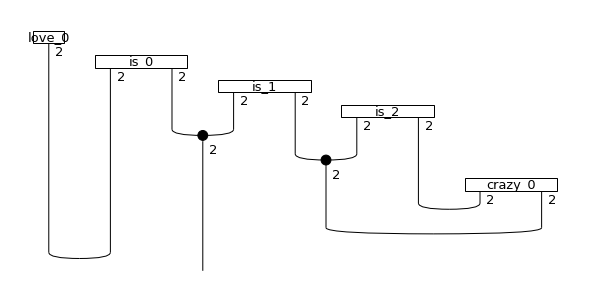

In [57]:
# Create an ansatz by assigning 2 dimensions to both
# noun and sentence spaces
from lambeq import AtomicType, SpiderAnsatz
from discopy import Dim

N = AtomicType.NOUN
S = AtomicType.SENTENCE

tensor_ansatz = SpiderAnsatz({N: Dim(2), S: Dim(2)})
train_circuits = [tensor_ansatz(d) for d in train_diagrams]
val_circuits = [tensor_ansatz(d) for d in val_diagrams]
test_circuits = [tensor_ansatz(d) for d in test_diagrams]
all_circuits = train_circuits + val_circuits + test_circuits

all_circuits[0].draw(figsize=(8,4), fontsize=13)

### 4.3. Zdefiniowanie modelu

In [58]:
from lambeq import PytorchModel

model = PytorchModel.from_diagrams(all_circuits)

In [59]:
model

PytorchModel()

In [60]:
import torch
BATCH_SIZE = 30
EPOCHS = 20
LEARNING_RATE = 3e-2
SEED = 0
sig = torch.sigmoid

def accuracy(y_hat, y):
    return torch.sum(torch.eq(torch.round(sig(y_hat)), y))/len(y)/2  # half due to double-counting

eval_metrics = {"acc": accuracy}

### 4.3 Zdefiniowanie algorytmu treningowego

In [61]:
from lambeq import PytorchTrainer

trainer = PytorchTrainer(
        model=model,
        loss_function=torch.nn.BCEWithLogitsLoss(),
        optimizer=torch.optim.AdamW,
        learning_rate=LEARNING_RATE,
        epochs=EPOCHS,
        evaluate_functions=eval_metrics,
        evaluate_on_train=True,
        verbose='text',
        seed=SEED)

### 4.4. Zdefiniowanie danych treningowych, walidacyjnych i testowych

In [62]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=BATCH_SIZE)

val_dataset = Dataset(val_circuits, val_labels, shuffle=False)

In [63]:
print(train_dataset[0])

(Diagram(dom=Dim(1), cod=Dim(2), boxes=[tensor.Box('love_0', Dim(1), Dim(2), data=love_0__n), tensor.Box('is_0', Dim(1), Dim(2, 2), data=is_0__n.r@s), tensor.Box('is_1', Dim(1), Dim(2, 2), data=is_1__s@s.l), tensor.Box('is_2', Dim(1), Dim(2, 2), data=is_2__s.l@n), Spider(2, 1, Dim(2)), Spider(2, 1, Dim(2)), tensor.Box('crazy_0', Dim(1), Dim(2, 2), data=crazy_0__n.r@s), Spider(2, 0, Dim(2)), Spider(2, 0, Dim(2)), Spider(2, 0, Dim(2))], offsets=[0, 1, 3, 5, 2, 3, 5, 4, 3, 0]), DeviceArray([1., 0.], dtype=float32))


In [64]:
print(val_dataset[0])

(Diagram(dom=Dim(1), cod=Dim(2), boxes=[tensor.Box('love_0', Dim(1), Dim(2), data=love_0__n), tensor.Box('is_0', Dim(1), Dim(2, 2), data=is_0__n.r@s), tensor.Box('is_1', Dim(1), Dim(2, 2), data=is_1__s@n.l), Spider(2, 1, Dim(2)), tensor.Box('trust_0', Dim(1), Dim(2), data=trust_0__n), Spider(2, 0, Dim(2)), Spider(2, 0, Dim(2))], offsets=[0, 1, 3, 2, 4, 3, 0]), DeviceArray([0., 1.], dtype=float32))


In [65]:
with Tensor.backend('pytorch'):
    print(train_dataset[0])  # becomes pytorch tensor

(Diagram(dom=Dim(1), cod=Dim(2), boxes=[tensor.Box('love_0', Dim(1), Dim(2), data=love_0__n), tensor.Box('is_0', Dim(1), Dim(2, 2), data=is_0__n.r@s), tensor.Box('is_1', Dim(1), Dim(2, 2), data=is_1__s@s.l), tensor.Box('is_2', Dim(1), Dim(2, 2), data=is_2__s.l@n), Spider(2, 1, Dim(2)), Spider(2, 1, Dim(2)), tensor.Box('crazy_0', Dim(1), Dim(2, 2), data=crazy_0__n.r@s), Spider(2, 0, Dim(2)), Spider(2, 0, Dim(2)), Spider(2, 0, Dim(2))], offsets=[0, 1, 3, 5, 2, 3, 5, 4, 3, 0]), tensor([1., 0.]))


In [66]:
trainer.fit(train_dataset, val_dataset, evaluation_step=1, logging_step=5)

Epoch 1:   train/loss: 0.7060   valid/loss: 0.6952   train/acc: 0.5000   valid/acc: 0.5000
Epoch 5:   train/loss: 0.6838   valid/loss: 0.6788   train/acc: 0.4889   valid/acc: 0.4891
Epoch 10:  train/loss: 0.6192   valid/loss: 0.6120   train/acc: 0.5556   valid/acc: 0.6957
Epoch 15:  train/loss: 0.3478   valid/loss: 0.5165   train/acc: 0.9111   valid/acc: 0.8261
Epoch 20:  train/loss: 0.0680   valid/loss: 0.7972   train/acc: 0.9889   valid/acc: 0.8261

Training completed!


### 4.5. Wyniki

Test accuracy: 0.8571428656578064


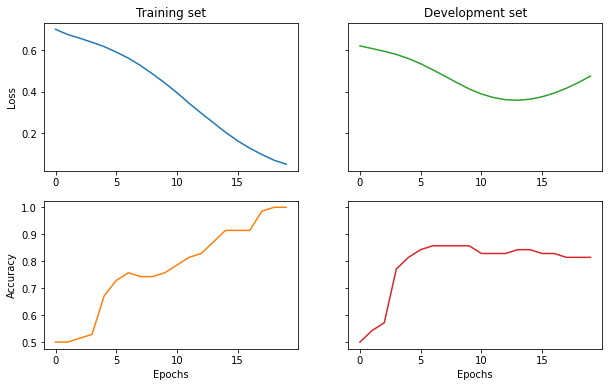

In [29]:
import matplotlib.pyplot as plt

fig1, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharey='row', figsize=(10, 6))

ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Epochs')
ax_br.set_xlabel('Epochs')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_tl.plot(trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(trainer.train_results['acc'], color=next(colours))
ax_tr.plot(trainer.val_costs, color=next(colours))
ax_br.plot(trainer.val_results['acc'], color=next(colours))

# print test accuracy
test_acc = accuracy(model(test_circuits), torch.tensor(test_labels))
print('Test accuracy:', test_acc.item())

## 5. Klasyfikacja binarna na przykładzie kwantowego modelu graficznego DisCoCat

In [1]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
import numpy as np

BATCH_SIZE = 30
EPOCHS = 20
SEED = 2

In [2]:
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = int(line[0])
            labels.append([t, 1-t])
            sentences.append(line[1:].strip())
    return labels, sentences

train_labels, train_data = read_data('Twitter_Train_Dataset_5.txt')
val_labels, val_data = read_data('Twitter_Val_Dataset_5.txt')
test_labels, test_data = read_data('Twitter_Test_Dataset_5.txt')

In [3]:
from lambeq import BobcatParser

parser = BobcatParser(root_cats=('NP', 'N'), verbose='text')

raw_train_diagrams = parser.sentences2diagrams(train_data, suppress_exceptions=True)
raw_val_diagrams = parser.sentences2diagrams(val_data, suppress_exceptions=True)
raw_test_diagrams = parser.sentences2diagrams(test_data, suppress_exceptions=True)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


In [4]:
train_diagrams = [
    diagram.normal_form()
    for diagram in raw_train_diagrams if diagram is not None
]
val_diagrams = [
    diagram.normal_form()
    for diagram in raw_val_diagrams if diagram is not None
]

test_diagrams = [
    diagram.normal_form()
    for diagram in raw_test_diagrams if diagram is not None
]

train_labels = [
    label for (diagram, label)
    in zip(raw_train_diagrams, train_labels)
    if diagram is not None]
val_labels = [
    label for (diagram, label)
    in zip(raw_val_diagrams, val_labels)
    if diagram is not None
]
test_labels = [
    label for (diagram, label)
    in zip(raw_test_diagrams, test_labels)
    if diagram is not None
]

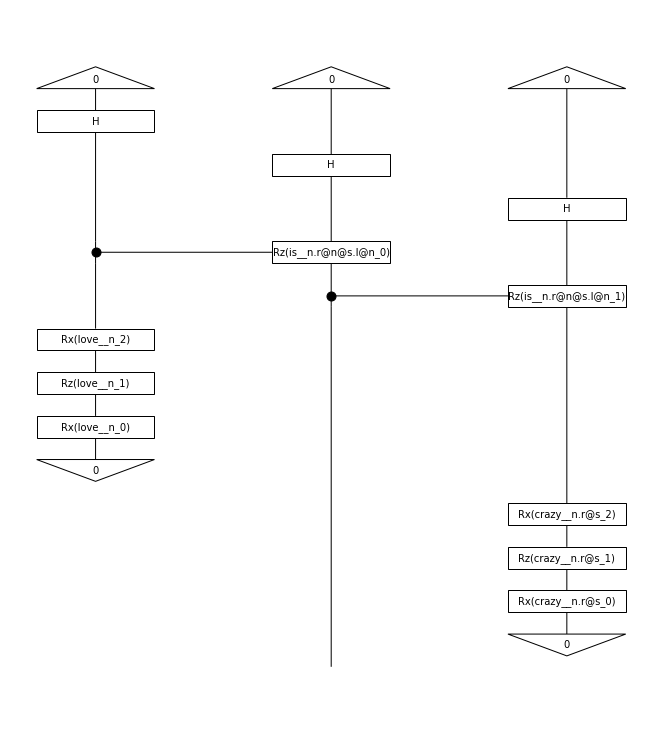

In [5]:
from lambeq import AtomicType, IQPAnsatz, remove_cups

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 0},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(remove_cups(diagram)) for diagram in train_diagrams]
val_circuits =  [ansatz(remove_cups(diagram))  for diagram in val_diagrams]
test_circuits =  [ansatz(remove_cups(diagram))  for diagram in test_diagrams]

train_circuits[0].draw(figsize=(9, 10))

In [6]:
from pytket.extensions.qiskit import AerBackend
from lambeq import TketModel

all_circuits = train_circuits + val_circuits + train_circuits

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}

model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

In [7]:
loss = lambda y_hat, y: -np.sum(y * np.log(y_hat)) / len(y)  # binary cross-entropy loss

acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting
eval_metrics = {"acc": acc}

In [8]:
from lambeq import QuantumTrainer, SPSAOptimizer

trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.01*EPOCHS},
    evaluate_functions=eval_metrics,
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

In [9]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=BATCH_SIZE)

val_dataset = Dataset(val_circuits, val_labels, shuffle=False)

In [10]:
trainer.fit(train_dataset, val_dataset, evaluation_step=1, logging_step=5)

Epoch 1:   train/loss: 0.8417   valid/loss: 0.6910   train/acc: 0.6000   valid/acc: 0.6522
Epoch 5:   train/loss: 0.7068   valid/loss: 0.6712   train/acc: 0.6444   valid/acc: 0.6087
Epoch 10:  train/loss: 0.6491   valid/loss: 0.6295   train/acc: 0.6889   valid/acc: 0.6957
Epoch 15:  train/loss: 0.5888   valid/loss: 0.6027   train/acc: 0.7111   valid/acc: 0.6957
Epoch 20:  train/loss: 0.5540   valid/loss: 0.5489   train/acc: 0.7556   valid/acc: 0.7174

Training completed!


Test accuracy: 0.8421052631578947


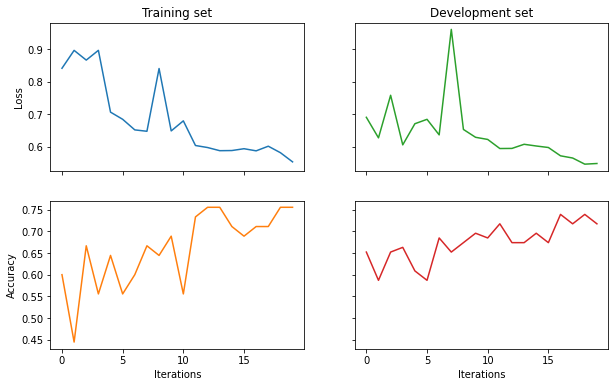

In [13]:
import matplotlib.pyplot as plt

fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_tl.plot(trainer.train_epoch_costs[::1], color=next(colours))
ax_bl.plot(trainer.train_results['acc'][::1], color=next(colours))
ax_tr.plot(trainer.val_costs[::1], color=next(colours))
ax_br.plot(trainer.val_results['acc'][::1], color=next(colours))

# print test accuracy
test_acc = acc(model(test_circuits), test_labels)
print('Test accuracy:', test_acc.item())